# Selecting random 50 images

In [1]:
import os
import random
import shutil

# Set the paths for your folders
source_folder = "Image_Subset_6_DEEPLEARNING"  # Folder with 140 images
destination_folder = 'Image_subset6_50_images'  # Folder to save the subset

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List all image files in the source folder
image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Randomly select 50 images
selected_images = random.sample(image_files, 50)

# Copy the selected images to the destination folder
for image in selected_images:
    shutil.copy(os.path.join(source_folder, image), destination_folder)

print(f"Successfully copied {len(selected_images)} images to {destination_folder}.")


Successfully copied 50 images to Image_subset6_50_images.


# Feature extraction using ResNet50

In [3]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model

# Définir le chemin du dossier contenant les images
image_folder = "Image_subset6_50_images"

# Charger le modèle ResNet50 pré-entraîné sans la dernière couche
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")
model = Model(inputs=base_model.input, outputs=base_model.output)

# Fonction pour extraire les features d'une image
def extract_features(image_path):
    # Charger et pré-traiter l'image
    image = load_img(image_path, target_size=(224, 224))  # Taille pour ResNet50
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)  # Ajouter une dimension pour le batch
    image = preprocess_input(image)  # Pré-traitement spécifique à ResNet50
    # Extraire les features avec le modèle
    features = model.predict(image)
    return features.flatten()

# Récupérer les chemins des images dans le dossier
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith((".jpg", ".png"))]

# Extraire les features pour toutes les images
features = np.array([extract_features(img) for img in image_paths])

print("Extraction des features terminée.")
print(f"Dimensions des features pour chaque image : {features.shape[1]}")
print(f"Nombre total d'images traitées : {features.shape[0]}")


/Users/samwall/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/ste

In [4]:
print (features)

[[0.         0.         0.25469628 ... 0.30225727 0.         0.9518949 ]
 [0.02263931 0.         0.06171764 ... 0.         0.         0.8731371 ]
 [0.30744758 0.135167   0.09981024 ... 0.36147943 0.25015453 0.3529131 ]
 ...
 [0.23297858 0.26562357 0.06863935 ... 0.34044376 0.         0.7113521 ]
 [0.0139916  0.         0.01446527 ... 0.12083486 0.         0.9569435 ]
 [0.04150972 0.08089346 0.25183463 ... 0.13032095 0.02931546 0.95852   ]]


In [7]:
from sklearn.decomposition import PCA
# Appliquer PCA avec 95% de variance expliquée
pca = PCA(n_components=0.95)
reduced_features = pca.fit_transform(features)

print("Dimensions après PCA :", reduced_features.shape)


Dimensions après PCA : (50, 37)


Clustering terminé.
Labels de cluster pour chaque image : [0 0 0 1 4 4 6 3 3 0 0 0 3 5 3 3 0 6 7 4 5 3 6 3 0 3 3 0 7 0 1 6 1 2 4 0 7
 3 3 4 7 5 5 5 0 1 3 0 7 0]


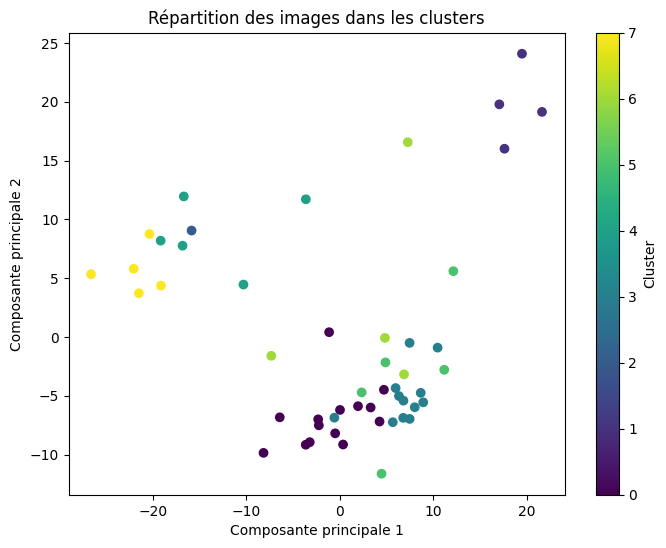

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Définir le nombre de clusters
n_clusters = 8

# Appliquer KMeans sur les features réduites
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(reduced_features)
labels = kmeans.labels_

# Afficher les résultats
print("Clustering terminé.")
print(f"Labels de cluster pour chaque image : {labels}")

# Visualisation de la répartition des clusters (facultatif)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.title("Répartition des images dans les clusters")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label="Cluster")
plt.show()


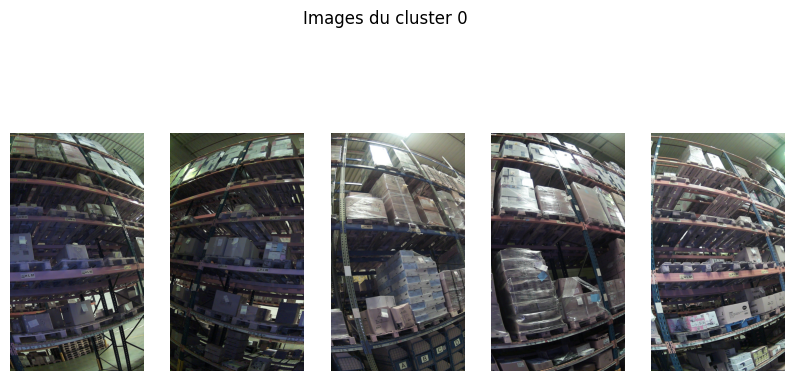

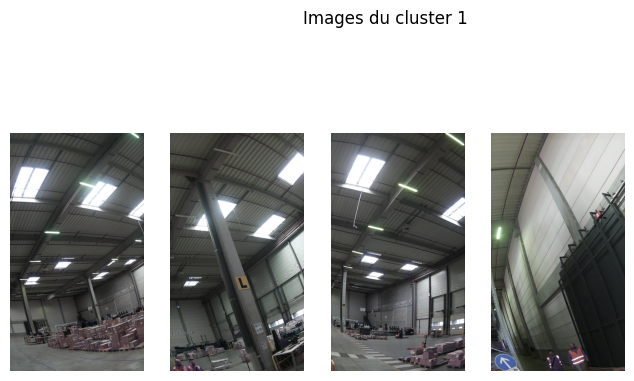

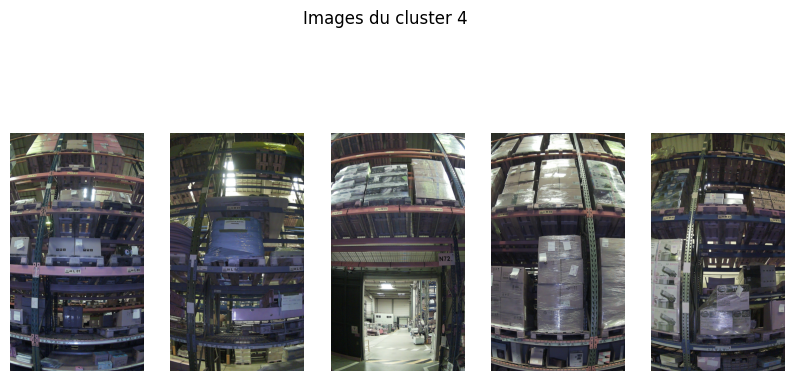

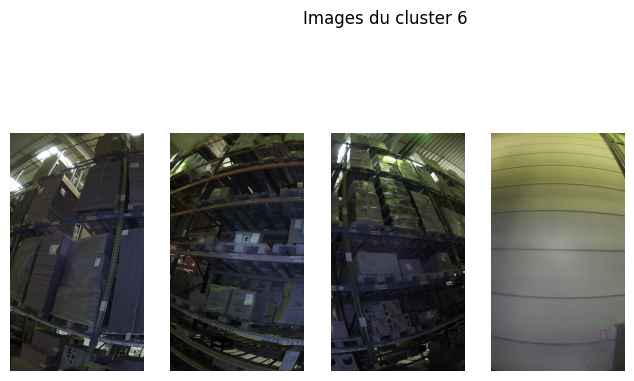

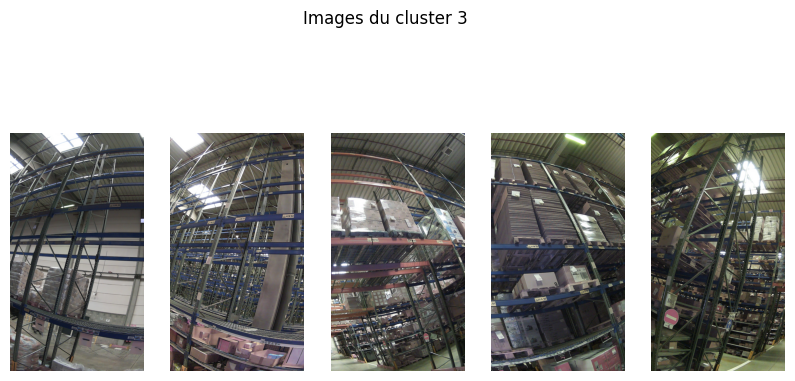

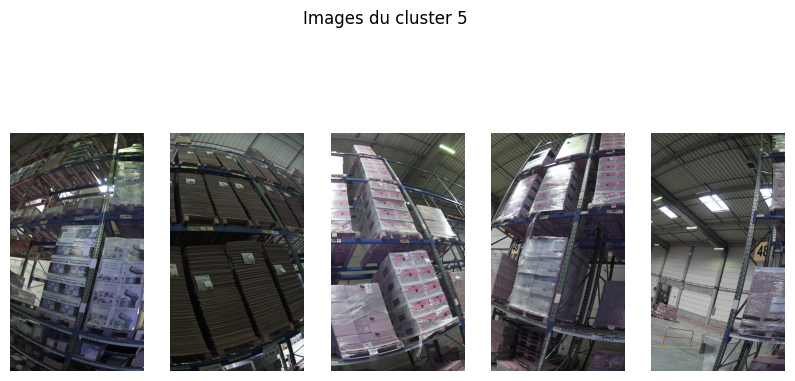

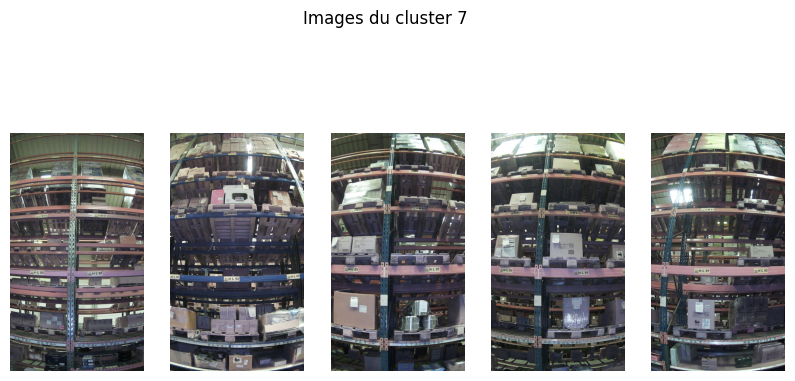

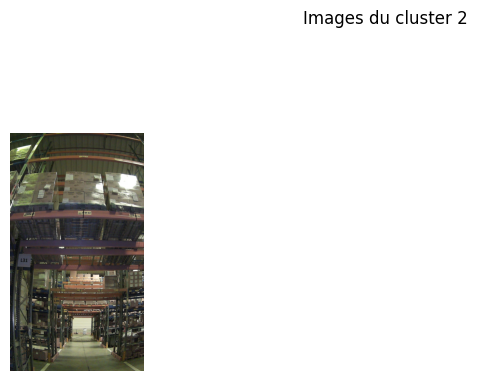

In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dossier contenant les images
image_folder = "Image_subset6_50_images"

# Assigner les images aux clusters
cluster_to_images = {}
for i, label in enumerate(labels):
    if label not in cluster_to_images:
        cluster_to_images[label] = []
    image_path = os.path.join(image_folder, os.listdir(image_folder)[i])
    cluster_to_images[label].append(image_path)

# Visualiser quelques images de chaque cluster
def show_images(images, cluster_label, max_images=5):
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Images du cluster {cluster_label}")
    for idx, img_path in enumerate(images[:max_images]):
        plt.subplot(1, max_images, idx + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Afficher les images pour chaque cluster
for cluster_label, images in cluster_to_images.items():
    show_images(images, cluster_label)


# code to select 5 images from each cluster

In [ ]:
import random
import shutil

# Créer un dossier pour les images sélectionnées
selected_images_folder = "selected_images"
os.makedirs(selected_images_folder, exist_ok=True)

# Nombre d'images à sélectionner par cluster
images_per_cluster = 5

# Sélectionner aléatoirement des images de chaque cluster
for cluster_label, images in cluster_to_images.items():
    selected_images = random.sample(images, min(images_per_cluster, len(images)))
    for img_path in selected_images:
        # Copier l'image dans le dossier des images sélectionnées
        shutil.copy(img_path, selected_images_folder)

print(f"Images sélectionnées et copiées dans : {selected_images_folder}")


# Elbow method (compactness of clusters)

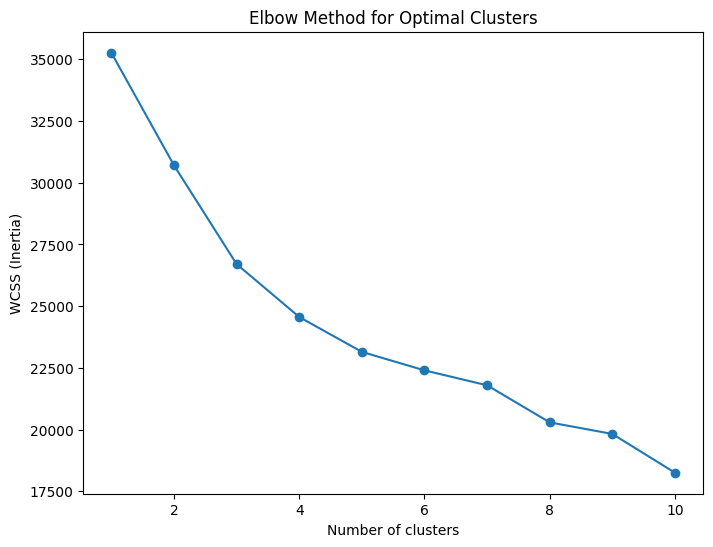

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Check from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


# Silouhette Score 

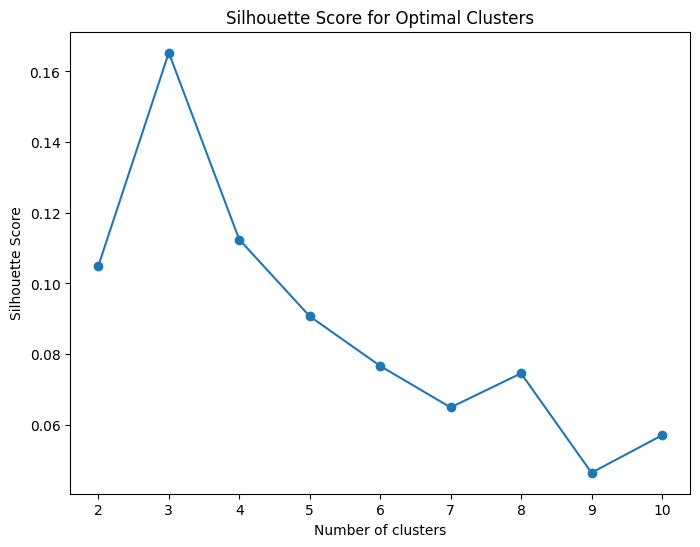

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters, as silhouette score is undefined for 1
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(reduced_features)
    score = silhouette_score(reduced_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Clusters")
plt.show()


# Davies-Bouldin Index

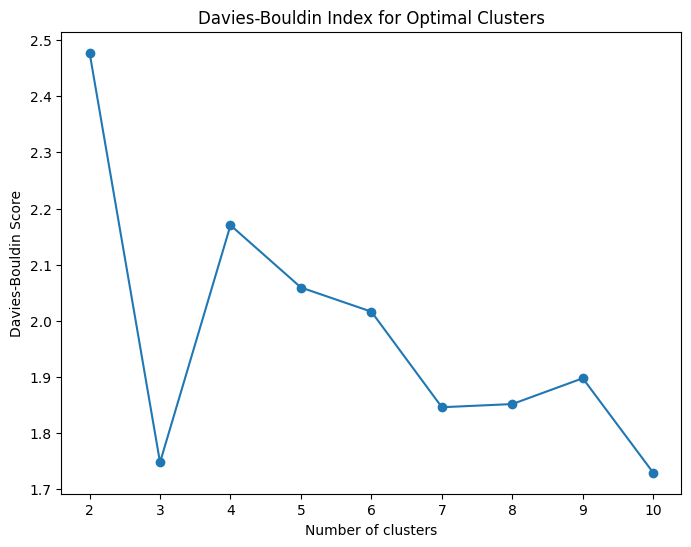

In [13]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for i in range(2, 11):  # Checking 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(reduced_features)
    score = davies_bouldin_score(reduced_features, kmeans.labels_)
    db_scores.append(score)

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Index for Optimal Clusters")
plt.show()


# Determine optimal Clusters

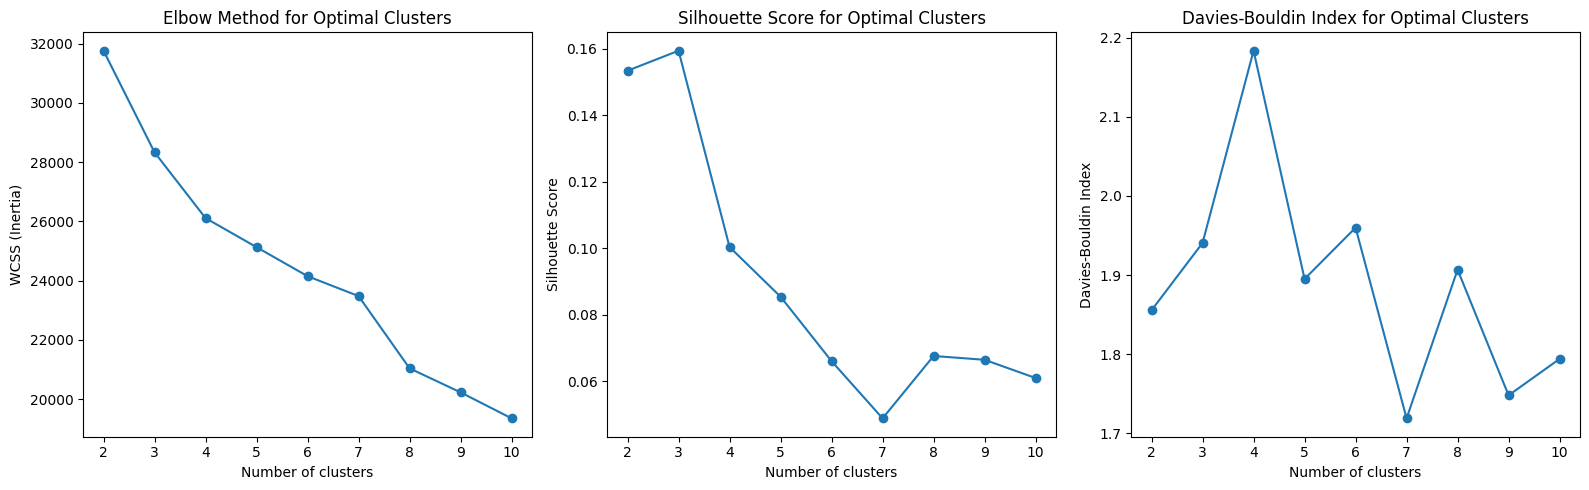

Nombre optimal de clusters : 8


In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

def calculate_optimal_clusters(features, max_clusters=10):
    # Stocker les scores
    wcss = []  # Inertie pour l'Elbow Method
    silhouette_scores = []
    davies_bouldin_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(features)
        labels = kmeans.labels_
        
        # Elbow method (WCSS)
        wcss.append(kmeans.inertia_)
        
        # Silhouette Score
        silhouette_scores.append(silhouette_score(features, labels))
        
        # Davies-Bouldin Index
        davies_bouldin_scores.append(davies_bouldin_score(features, labels))
    
    # Déterminer la meilleure valeur de clusters en fonction des trois méthodes
    optimal_clusters = determine_best_cluster_value(wcss, silhouette_scores, davies_bouldin_scores)
    
    # Optionnellement, afficher les graphes pour visualiser
    plot_clustering_scores(wcss, silhouette_scores, davies_bouldin_scores, max_clusters)
    
    return optimal_clusters

def determine_best_cluster_value(wcss, silhouette_scores, davies_bouldin_scores):
    # Méthode de sélection du meilleur nombre de clusters en combinant les métriques
    best_silhouette_index = np.argmax(silhouette_scores)
    best_db_index = np.argmin(davies_bouldin_scores)
    
    # Utilisation d'un système de rangs combinés
    combined_ranks = np.argsort(wcss) + np.argsort(-np.array(silhouette_scores)) + np.argsort(davies_bouldin_scores)
    
    # Le rang le plus bas indique la solution la plus équilibrée
    optimal_clusters = np.argmin(combined_ranks) + 2  # +2 car la gamme commence à 2 clusters
    return optimal_clusters

def plot_clustering_scores(wcss, silhouette_scores, davies_bouldin_scores, max_clusters):
    clusters_range = range(2, max_clusters + 1)

    plt.figure(figsize=(16, 5))
    
    # Graphique de l'Elbow Method
    plt.subplot(1, 3, 1)
    plt.plot(clusters_range, wcss, marker='o')
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS (Inertia)")
    
    # Graphique du Silhouette Score
    plt.subplot(1, 3, 2)
    plt.plot(clusters_range, silhouette_scores, marker='o')
    plt.title("Silhouette Score for Optimal Clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    
    # Graphique du Davies-Bouldin Index
    plt.subplot(1, 3, 3)
    plt.plot(clusters_range, davies_bouldin_scores, marker='o')
    plt.title("Davies-Bouldin Index for Optimal Clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Davies-Bouldin Index")
    
    plt.tight_layout()
    plt.show()


optimal_clusters = calculate_optimal_clusters(features)
print(f"Nombre optimal de clusters : {optimal_clusters}")


# Cree des sous dossiers avec chaque cluster

In [17]:
import os
import shutil

# Dossier racine pour stocker les dossiers de clusters
clusters_root_folder = "clusters"
os.makedirs(clusters_root_folder, exist_ok=True)

# Parcourir chaque cluster et copier les images dans le dossier correspondant
for cluster_label, images in cluster_to_images.items():
    # Créer un dossier pour chaque cluster
    cluster_folder = os.path.join(clusters_root_folder, f"cluster_{cluster_label}")
    os.makedirs(cluster_folder, exist_ok=True)
    
    # Copier chaque image dans le dossier du cluster
    for img_path in images:
        shutil.copy(img_path, cluster_folder)

print(f"Images copiées dans les dossiers de clusters dans : {clusters_root_folder}")


Images copiées dans les dossiers de clusters dans : clusters
